In [1]:
import glob
import pickle
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
objPoints = pickle.load(open( "objPoints", "rb" ))
imgPoints = pickle.load(open("imgPoints","rb"))

In [3]:
image = mpimg.imread('test_images/straight_lines1.jpg')
ret,mtx,dist,rvecs,tvecs=cv2.calibrateCamera(objPoints,imgPoints,image.shape[1::-1],None,None)
undist = cv2.undistort(image,mtx,dist,None,mtx)


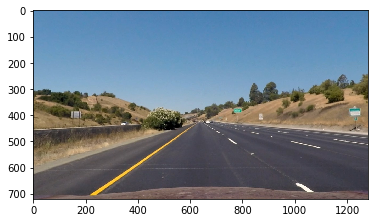

In [4]:
plt.imshow(undist)

[[  512.   468.]
 [  768.   468.]
 [ 1280.   720.]
 [  128.   720.]]


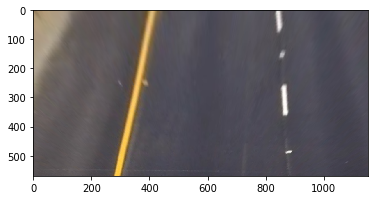

In [8]:
sh = undist.shape
tl = [sh[1]*0.4,sh[0]*0.65]
tr = [sh[1]*0.6,sh[0]*0.65]
bl = [sh[1]*0.1,sh[0]]
br = [sh[1],sh[0]]

src = np.float32([tl,tr,br,bl])
print(src)
widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))

maxWidth = max(int(widthA), int(widthB))
maxHeight = max(int(heightA), int(heightB))

#dst = np.float32([[0, 0],[maxWidth - 1, 0],[maxWidth - 1, maxHeight - 1],[0, maxHeight - 1]])
dst = np.float32([[200,0],[1000,100],[1000,680],[200,680]])

M = cv2.getPerspectiveTransform(src,dst)
img_size = (sh[1],sh[0])
warped = cv2.warpPerspective(undist,M,(maxWidth,maxHeight),flags=cv2.INTER_LINEAR)
plt.imshow(warped)

[[(512, 468), (768, 468), (1280, 720), (128, 720)]]


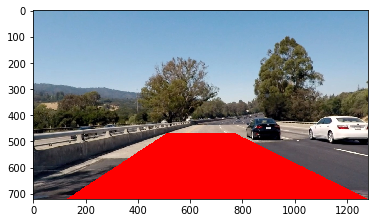

In [26]:

cp = np.copy(undist)
tl1 = (int(sh[1]*0.4),int(sh[0]*0.65))
tr1 = (int(sh[1]*0.6),int(sh[0]*0.65))
bl1 = (int(sh[1]*0.1),int(sh[0]))
br1 = (int(sh[1]),int(sh[0]))
vertices = [[tl1,tr1,br1,bl1]]
plt.clf()
print(vertices)
color_mask = (255,) * 3
cv2.fillPoly(cp,np.array(vertices),[255,0,0])
plt.imshow(cp)

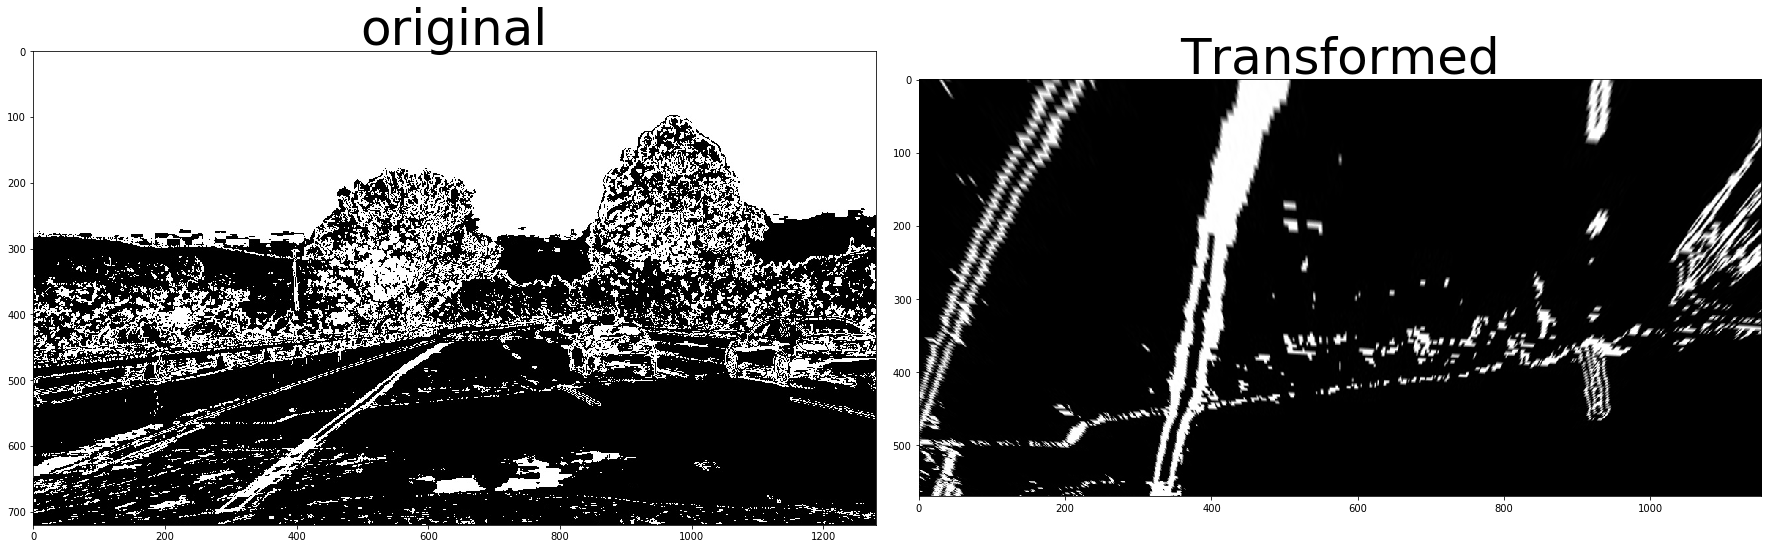

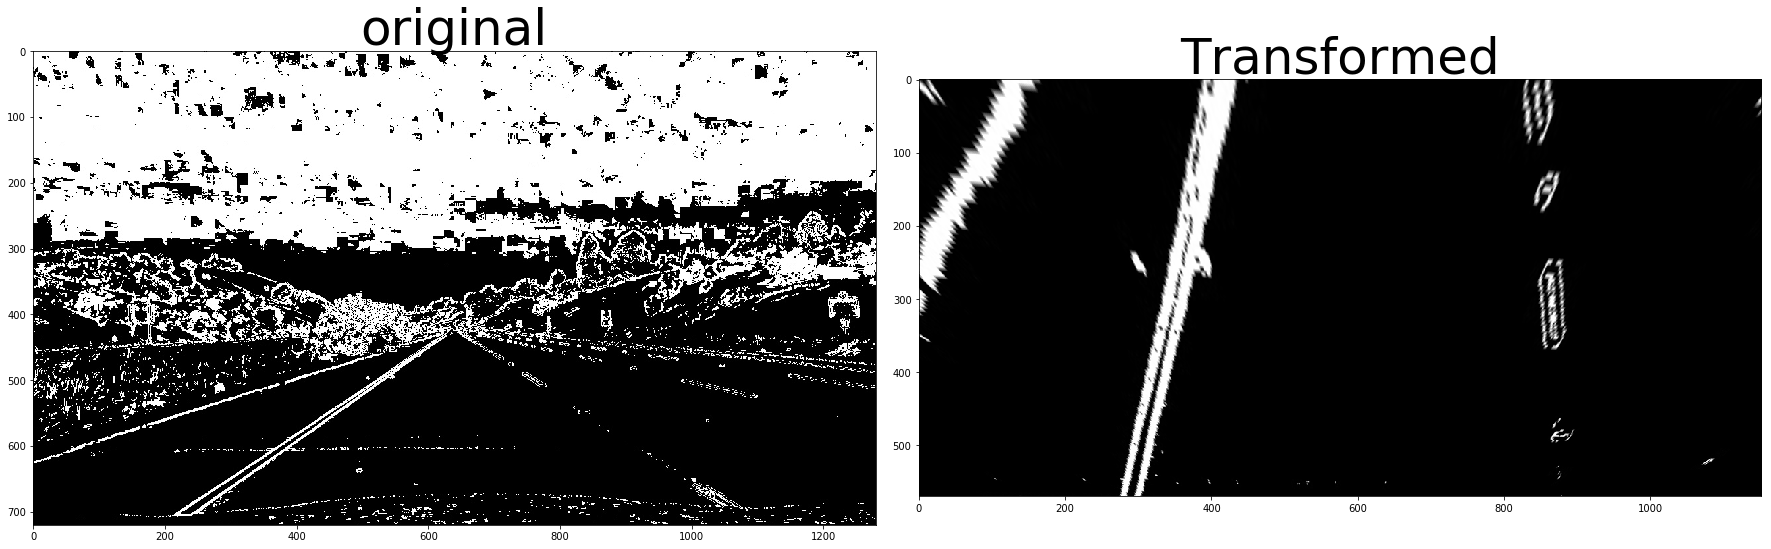

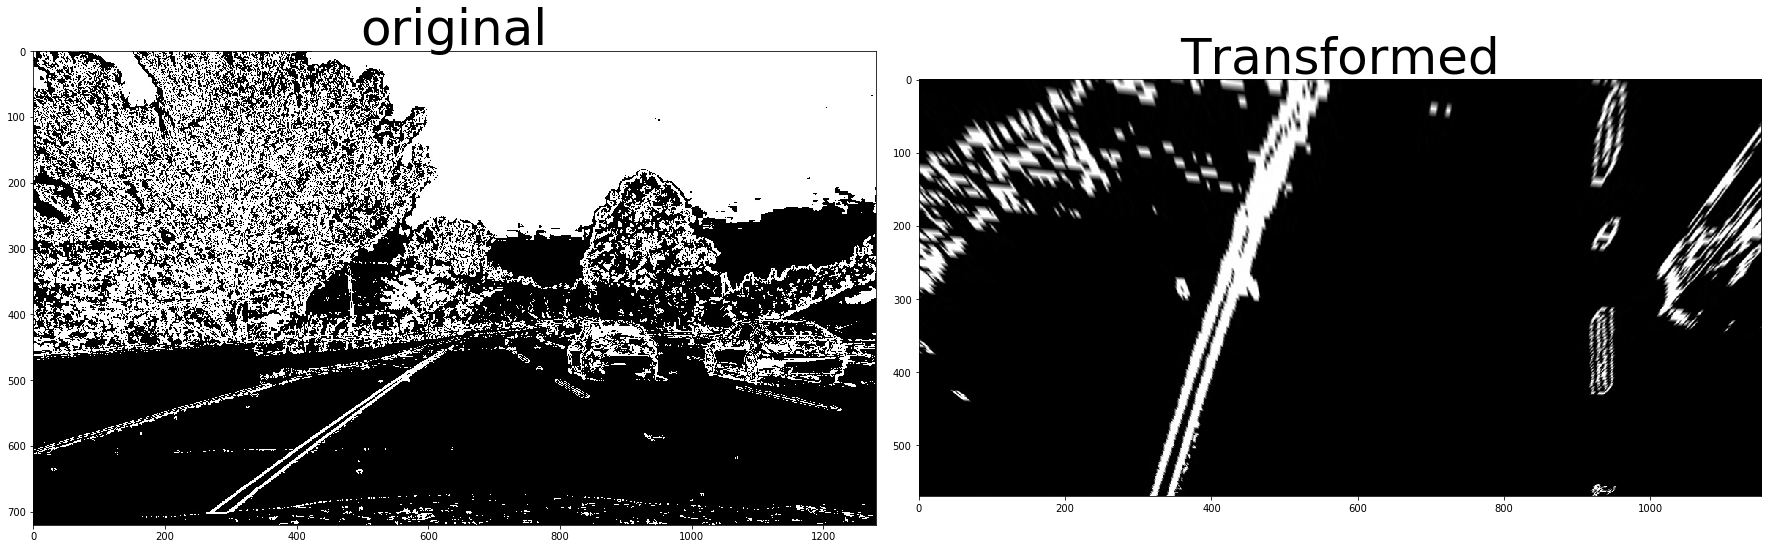

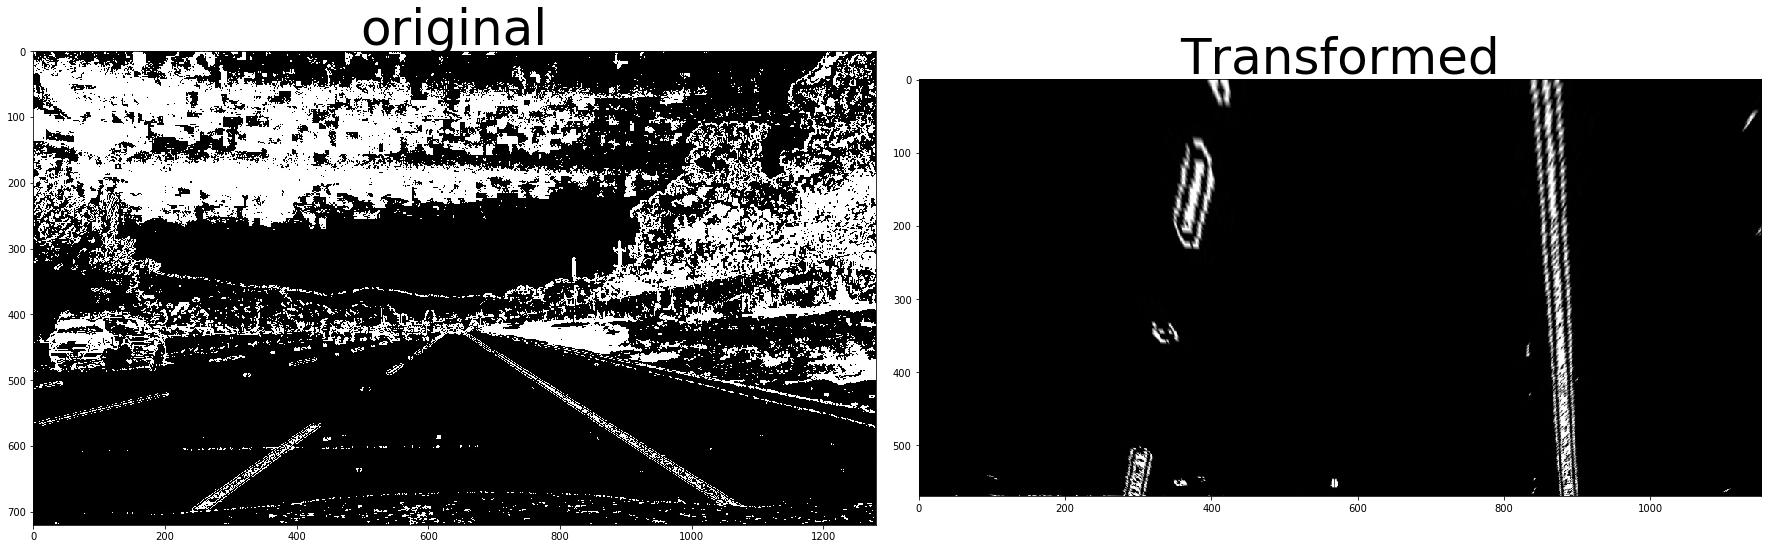

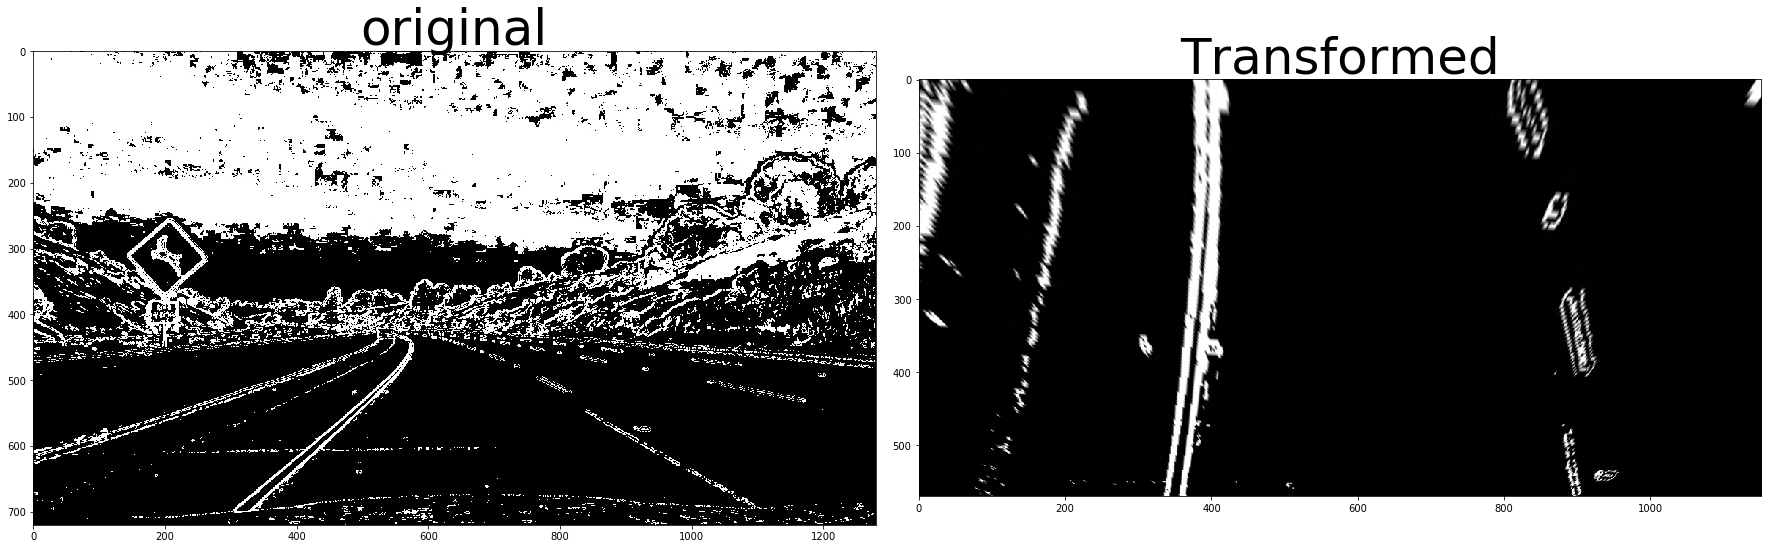

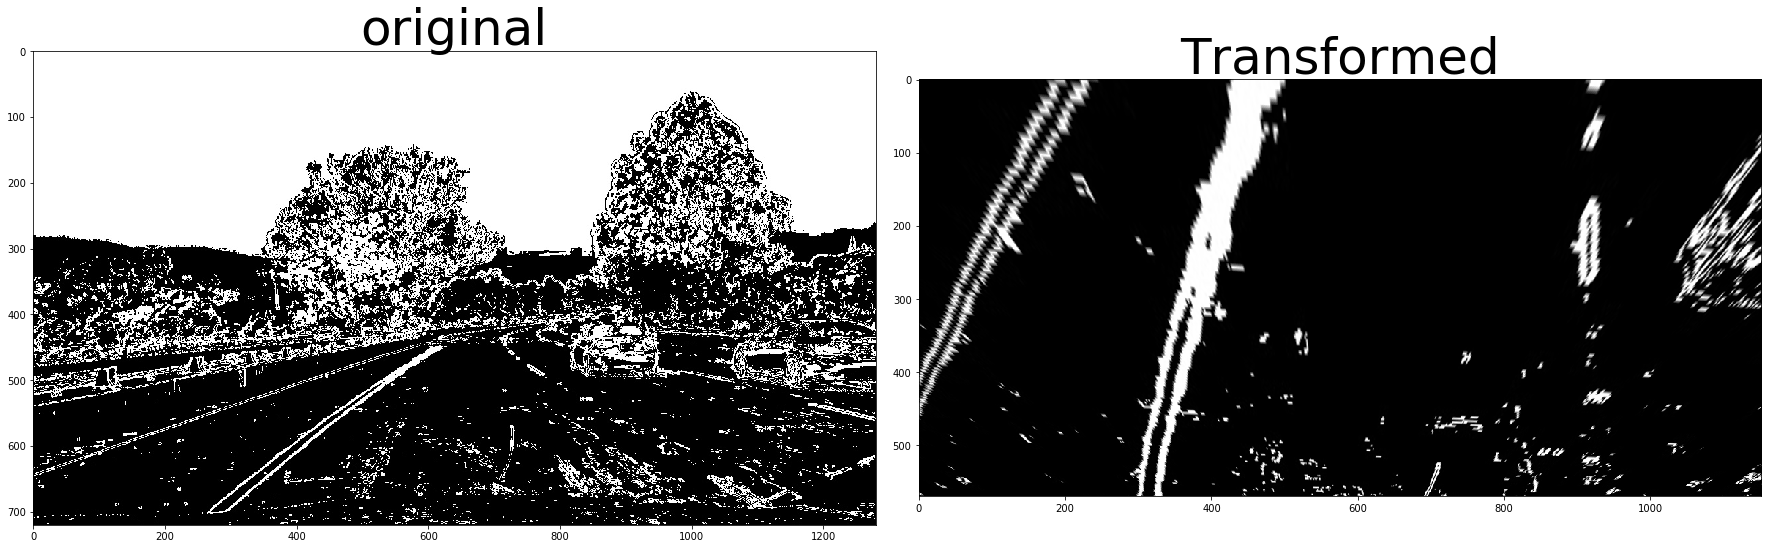

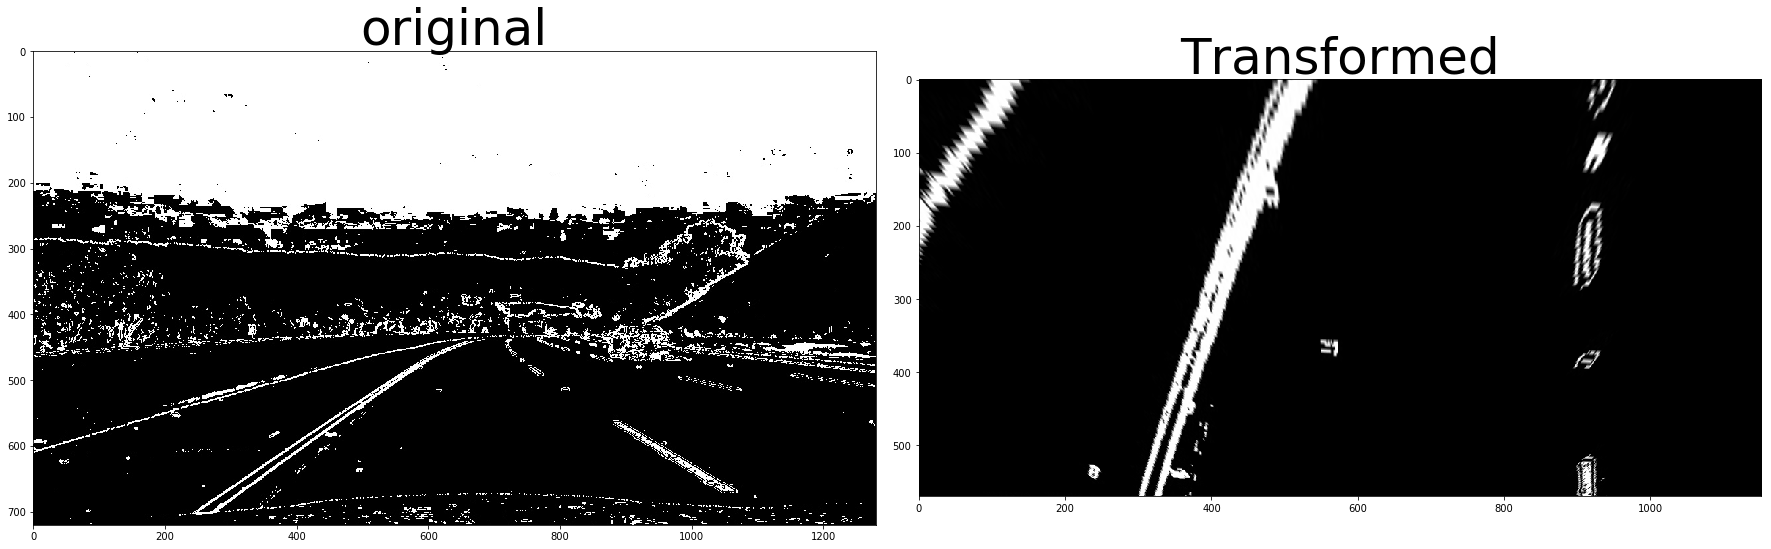

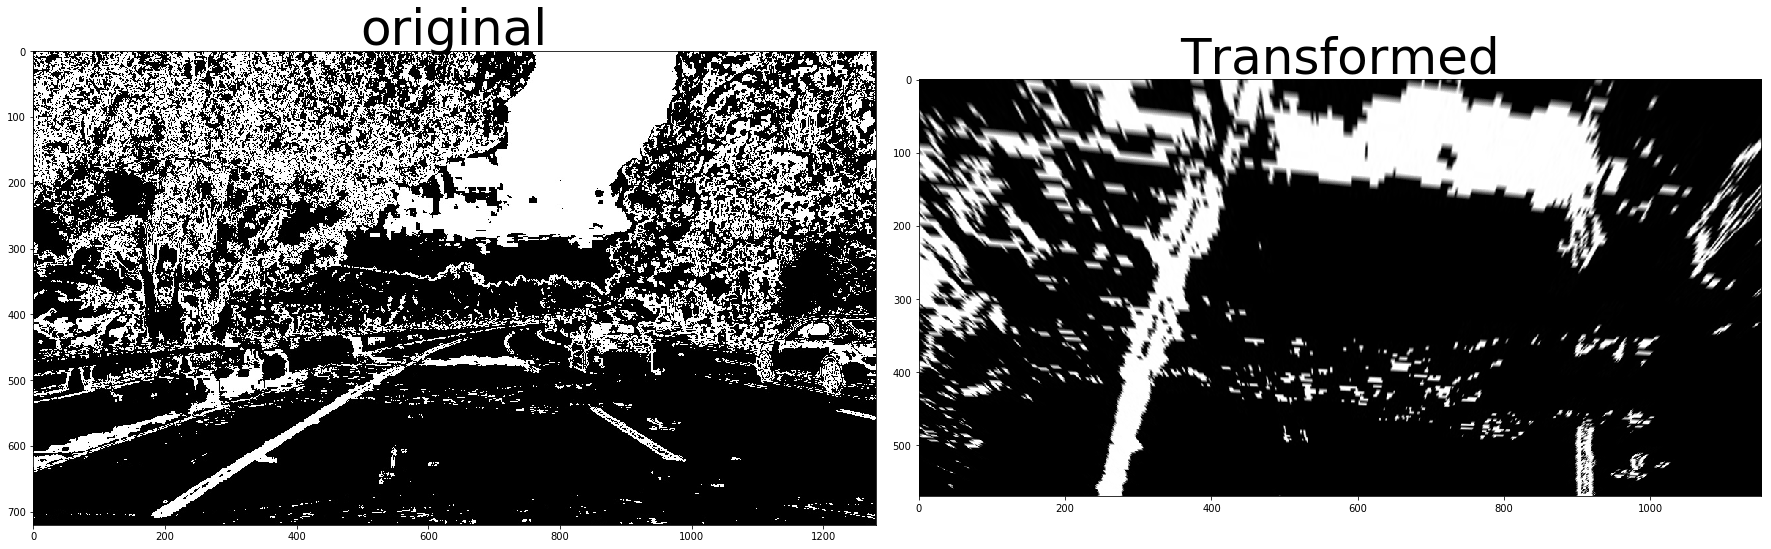

In [10]:
count=1
for img_name in glob.glob("./test_images_output/out*.jpg"):
    image = mpimg.imread(img_name)
    #ret,mtx,dist,rvecs,tvecs=cv2.calibrateCamera(objPoints,imgPoints,image.shape[::-1],None,None)
    undist = image
    sh = undist.shape
    tl = [sh[1]*0.4,sh[0]*0.65]
    tr = [sh[1]*0.6,sh[0]*0.65]
    bl = [sh[1]*0.1,sh[0]]
    br = [sh[1],sh[0]]

    src = np.float32([tl,tr,br,bl])

    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))

    maxWidth = max(int(widthA), int(widthB))
    maxHeight = max(int(heightA), int(heightB))
    #dst = np.float32([[0, 0],[maxWidth - 1, 0],[maxWidth - 1, maxHeight - 1],[0, maxHeight - 1]])
    #dst = np.float32([[sh[1]*0.1, 0],[sh[1]*0.9, 0],[sh[1], sh[0]+0.6*sh[0]],[0, sh[0]+0.6*sh[0]]])
    dst = np.float32([[200,0],[1000,100],[1000,680],[200,680]])
    M = cv2.getPerspectiveTransform(src,dst)
    img_size = (sh[1],sh[0])
    warped = cv2.warpPerspective(undist,M,(maxWidth,maxHeight),flags=cv2.INTER_LINEAR)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(undist,cmap='gray')
    ax1.set_title("original", fontsize=50)
    ax2.imshow(warped, cmap='gray')
    ax2.set_title('Transformed', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.show()
    #cv2.imwrite("test_images_output/pers"+str(count)+".jpg",warped*255)
    count+=1
    